In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [60]:
data=pd.read_csv("C:\\Users\\manish singh\\OneDrive\\Desktop\\exl_database\\Expanded_data_with_more_features.csv")

In [70]:
df=data.copy()

In [5]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [8]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [9]:
# Droping Unnamed:0 column:

df.drop("Unnamed: 0",axis=1,inplace=True)

In [10]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [11]:
categorical = []
numerical = []
for col in df:
    if df[col].dtype=='O':
        categorical.append(col)
    else:
        numerical.append(col)
        
    

In [12]:
print(categorical)
print()
print(numerical)

['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours']

['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']


In [13]:
for col in categorical:
    df[col]=df[col].str.strip()

In [14]:
#Missing values in categorical columns

df[categorical].isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
TransportMeans         3134
WklyStudyHours          955
dtype: int64

In [15]:
#Missing values in numerical columns

df[numerical].isnull().sum()

NrSiblings      1572
MathScore          0
ReadingScore       0
WritingScore       0
dtype: int64

# <center>====Handling Missing Values====<center>

# <center>Handling missing values on categorical columns<center>

In [71]:
df[categorical].isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
TransportMeans         3134
WklyStudyHours          955
dtype: int64

In [46]:
df[categorical].isnull().mean()*100

Gender                  0.000000
EthnicGroup             6.005026
ParentEduc              6.021344
LunchType               0.000000
TestPrep                5.972390
ParentMaritalStatus     3.883685
PracticeSport           2.059332
IsFirstChild            2.950295
TransportMeans         10.228126
WklyStudyHours          3.116739
dtype: float64

In [83]:
missing_cols=['ParentMaritalStatus','PracticeSport','IsFirstChild','WklyStudyHours']

In [77]:
# droping missing values which are lower than 4%

for col in categorical:
    if df[col].isnull().mean()*100< 4.0:
        df.dropna(subset=(missing_cols),inplace=True)

In [78]:
df[categorical].isnull().sum()

Gender                    0
EthnicGroup            1602
ParentEduc             1615
LunchType                 0
TestPrep               1618
ParentMaritalStatus       0
PracticeSport             0
IsFirstChild              0
TransportMeans         2771
WklyStudyHours            0
dtype: int64

In [84]:
cat_missing_val_col=['EthnicGroup','ParentEduc','TestPrep','TransportMeans']

# <center>====Mode imputation====</center>

In [79]:
df_mode=df.copy()

In [80]:
df_mode[categorical].isnull().sum()

Gender                    0
EthnicGroup            1602
ParentEduc             1615
LunchType                 0
TestPrep               1618
ParentMaritalStatus       0
PracticeSport             0
IsFirstChild              0
TransportMeans         2771
WklyStudyHours            0
dtype: int64

In [81]:
def mode_imputation(data,columns):
        data=df
        for col in columns:
            
            mode=df_mode[col].mode()[0]

            df_mode[col].value_counts()

            df_mode[col].fillna(mode,inplace=True)

In [85]:
mode_imputation(df_mode,cat_missing_val_col)

In [86]:
df_mode[categorical].isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
TransportMeans         0
WklyStudyHours         0
dtype: int64

# <center>Comparing graphs before and after Mode imputation<center>

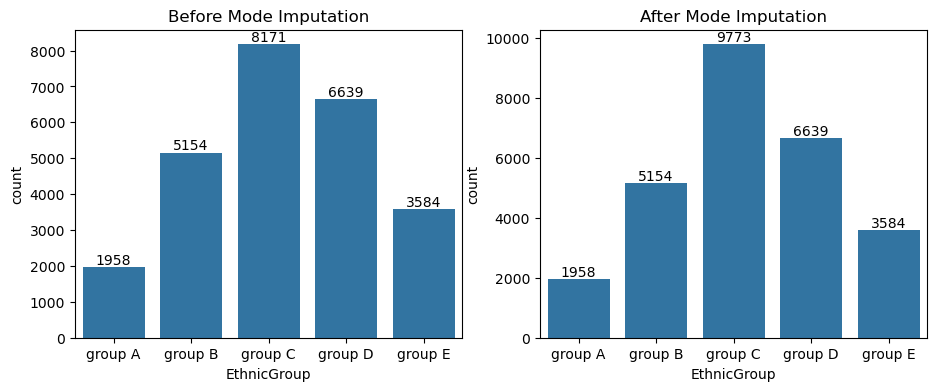

In [189]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.title("Before Mode Imputation")
ax=sns.countplot(pd.DataFrame(df['EthnicGroup'].sort_values()),x='EthnicGroup')
for bar in ax.containers:
    ax.bar_label(bar)

plt.subplot(1,2,2)
plt.title("After Mode Imputation")
ax=sns.countplot(pd.DataFrame(df_mode['EthnicGroup'].sort_values()),x='EthnicGroup')
for bar in ax.containers:
    ax.bar_label(bar)    

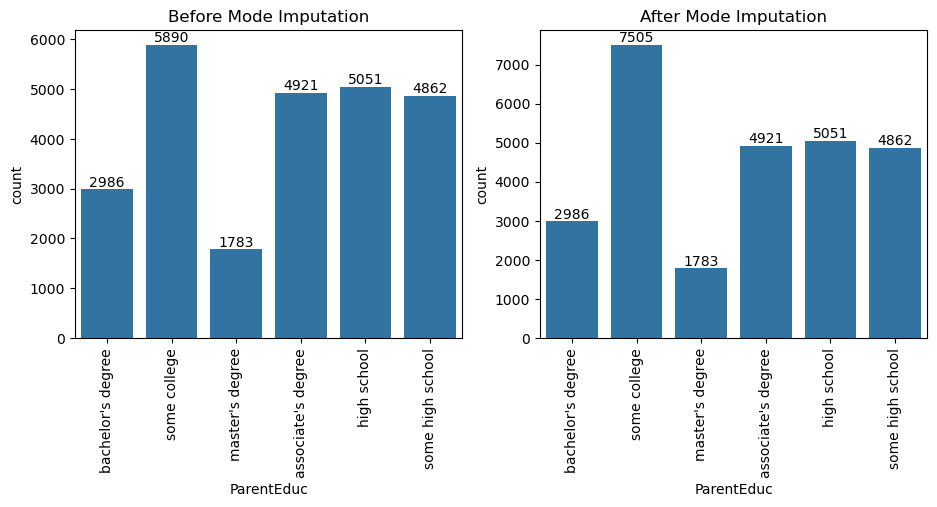

In [170]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.title("Before Mode Imputation")
plt.xticks(rotation=90)
ax=sns.countplot(df,x='ParentEduc')
for bar in ax.containers:
    ax.bar_label(bar)

plt.subplot(1,2,2)
plt.title("After Mode Imputation")
plt.xticks(rotation=90)
ax=sns.countplot(df_mode,x='ParentEduc')
for bar in ax.containers:
    ax.bar_label(bar)

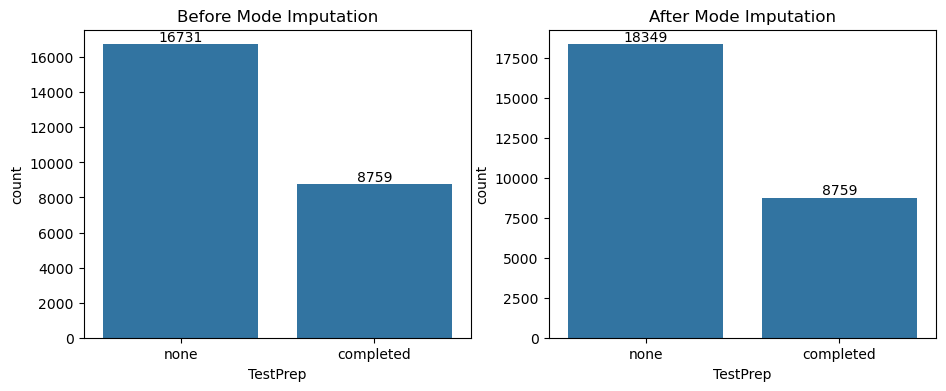

In [171]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.title("Before Mode Imputation")
ax=sns.countplot(df,x='TestPrep')
for bar in ax.containers:
    ax.bar_label(bar)

plt.subplot(1,2,2)
plt.title("After Mode Imputation")
ax=sns.countplot(df_mode,x='TestPrep')
for bar in ax.containers:
    ax.bar_label(bar)

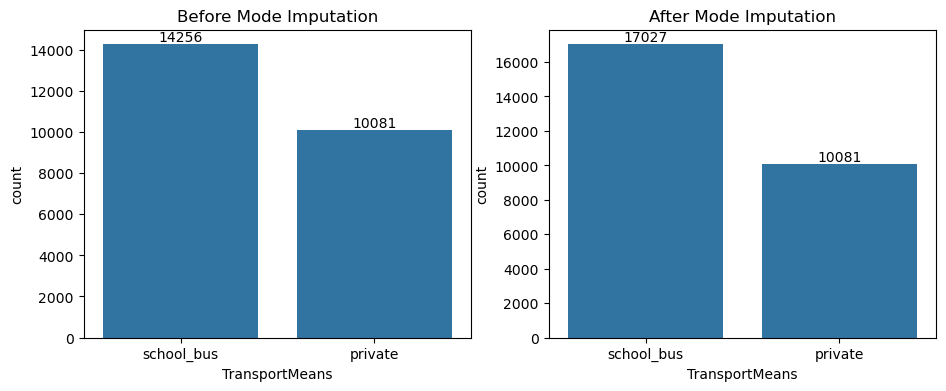

In [172]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.title("Before Mode Imputation")
ax=sns.countplot(df,x='TransportMeans')
for bar in ax.containers:
    ax.bar_label(bar)

plt.subplot(1,2,2)
plt.title("After Mode Imputation")
ax=sns.countplot(df_mode,x='TransportMeans')
for bar in ax.containers:
    ax.bar_label(bar)

 <b>Mode imputation</B> give good results in handling outliers but one category is dominating in every column.

# <center>====Random value  imputation====</center>

In [94]:
df_ran=df.copy()

In [95]:
df_ran[categorical].isnull().sum()

Gender                    0
EthnicGroup            1602
ParentEduc             1615
LunchType                 0
TestPrep               1618
ParentMaritalStatus       0
PracticeSport             0
IsFirstChild              0
TransportMeans         2771
WklyStudyHours            0
dtype: int64

In [96]:
def randomvalueimpuation_cat(data,columns):
    df=data
    for col in columns:
        non_missing=df_ran[col].dropna().values
        df_ran[col]=df_ran[col].apply(lambda x:np.random.choice(non_missing)if pd.isnull(x) else x)

In [98]:
randomvalueimpuation_cat(df_ran,cat_missing_val_col)

In [100]:
df_ran[categorical].isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
TransportMeans         0
WklyStudyHours         0
dtype: int64

# <center>Comparing graphs before and after Random Value imputation<center>

In [55]:
pd.DataFrame(data['EthnicGroup'].sort_values())
df_ran=pd.DataFrame(df['EthnicGroup'].sort_values())

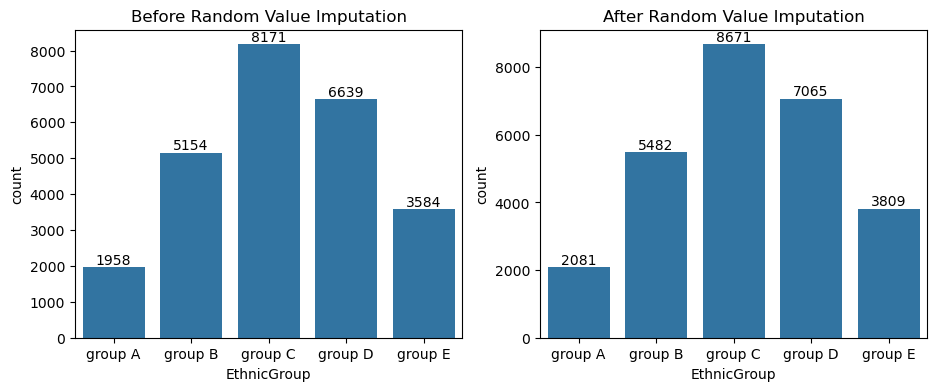

In [173]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.title("Before Random Value Imputation")
ax=sns.countplot(pd.DataFrame(df['EthnicGroup'].sort_values()),x='EthnicGroup')
for bar in ax.containers:
    ax.bar_label(bar)

plt.subplot(1,2,2)
plt.title("After Random Value Imputation")
ax=sns.countplot(pd.DataFrame(df_ran['EthnicGroup'].sort_values()),x='EthnicGroup')
for bar in ax.containers:
    ax.bar_label(bar)  

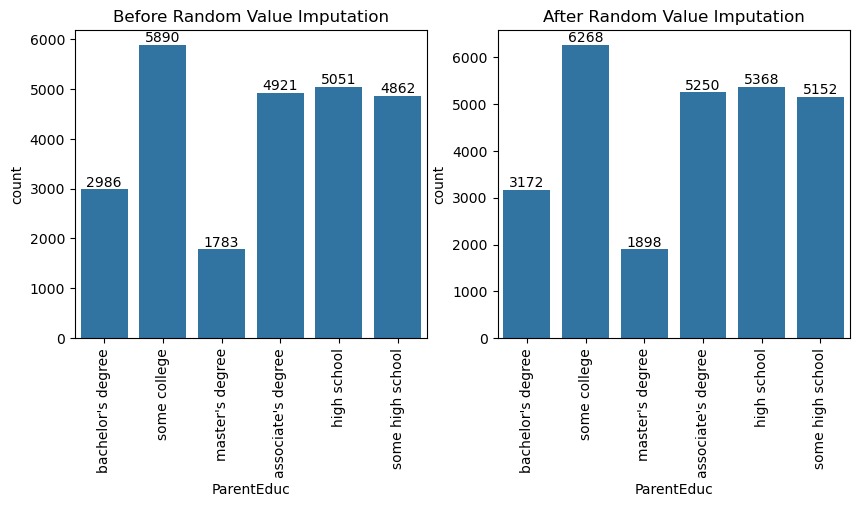

In [174]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title("Before Random Value Imputation")
ax=sns.countplot(df,x='ParentEduc')
for bar in ax.containers:
    ax.bar_label(bar)

plt.subplot(1,2,2)
plt.xticks(rotation=90)
plt.title("After Random Value Imputation")
ax=sns.countplot(df_ran,x='ParentEduc')
for bar in ax.containers:
    ax.bar_label(bar)  

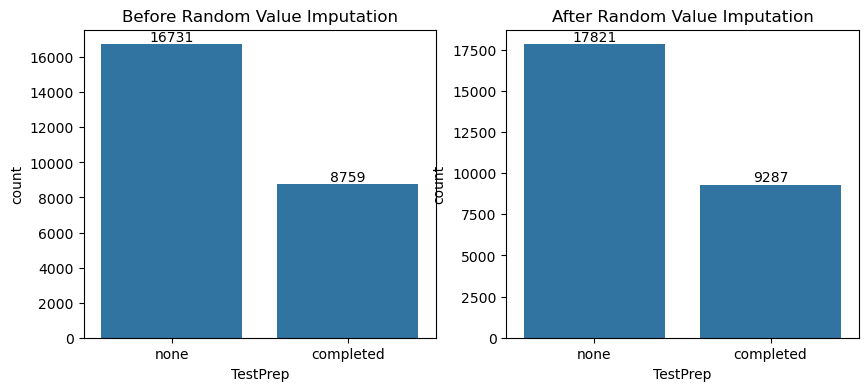

In [175]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Before Random Value Imputation")
ax=sns.countplot(df,x='TestPrep')
for bar in ax.containers:
    ax.bar_label(bar)

plt.subplot(1,2,2)
plt.title("After Random Value Imputation")
ax=sns.countplot(df_ran,x='TestPrep')
for bar in ax.containers:
    ax.bar_label(bar) 

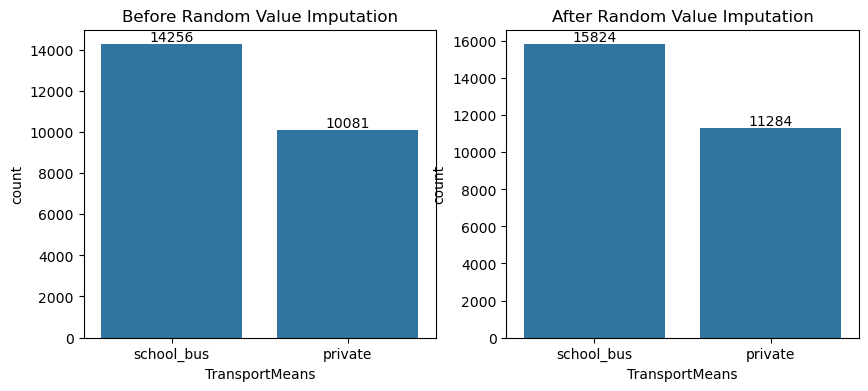

In [177]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Before Random Value Imputation")
ax=sns.countplot(df,x='TransportMeans')
for bar in ax.containers:
    ax.bar_label(bar)

plt.subplot(1,2,2)
plt.title("After Random Value Imputation")
ax=sns.countplot(df_ran,x='TransportMeans')
for bar in ax.containers:
    ax.bar_label(bar) 

 <b>Random Value imputation</b> gives better results as compare to <b>Mode imputation</b> as there's no distortion in the data.

# <center>====Missing value indicator====<center> 

In [108]:
df_mis=df.copy()

In [109]:
df_mis[categorical].isnull().sum()

Gender                    0
EthnicGroup            1602
ParentEduc             1615
LunchType                 0
TestPrep               1618
ParentMaritalStatus       0
PracticeSport             0
IsFirstChild              0
TransportMeans         2771
WklyStudyHours            0
dtype: int64

In [111]:
for col in cat_missing_val_col:
    df_mis[col].fillna('Missing',inplace=True)
    

In [112]:
df_mis[categorical].isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
TransportMeans         0
WklyStudyHours         0
dtype: int64

# <center>Comparing graphs before and after imputation<center>

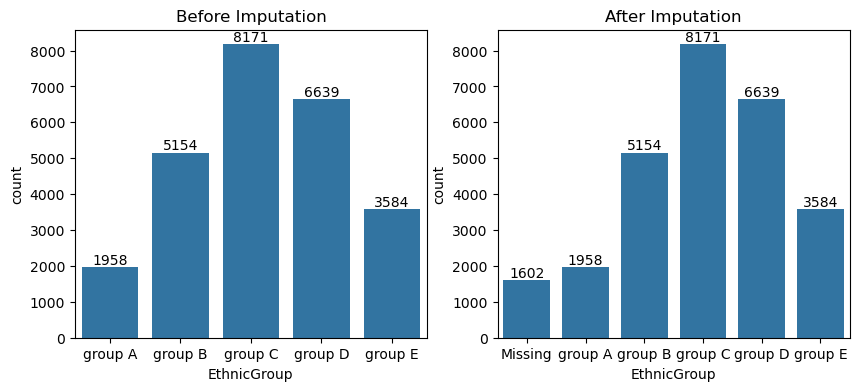

In [191]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Before Imputation')
ax=sns.countplot(pd.DataFrame(df['EthnicGroup'].sort_values()),x='EthnicGroup')
for bar in ax.containers:
    ax.bar_label(bar)

plt.subplot(1,2,2)
plt.title('After Imputation')
ax=sns.countplot(pd.DataFrame(df_mis['EthnicGroup'].sort_values()),x='EthnicGroup')
for bar in ax.containers:
    ax.bar_label(bar) 

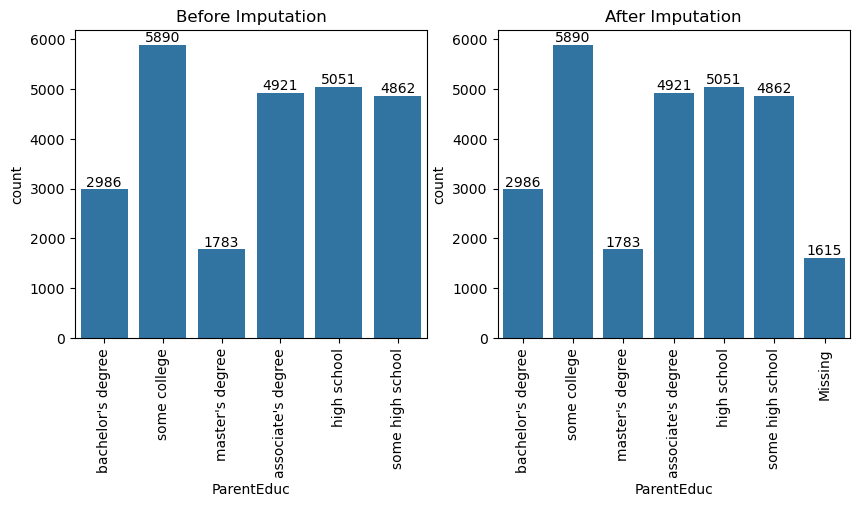

In [114]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Before Imputation')
plt.xticks(rotation=90)
ax=sns.countplot(df,x='ParentEduc')
for bar in ax.containers:
    ax.bar_label(bar)

plt.subplot(1,2,2)
plt.title('After Imputation')
plt.xticks(rotation=90)
ax=sns.countplot(df_mis,x='ParentEduc')
for bar in ax.containers:
    ax.bar_label(bar) 

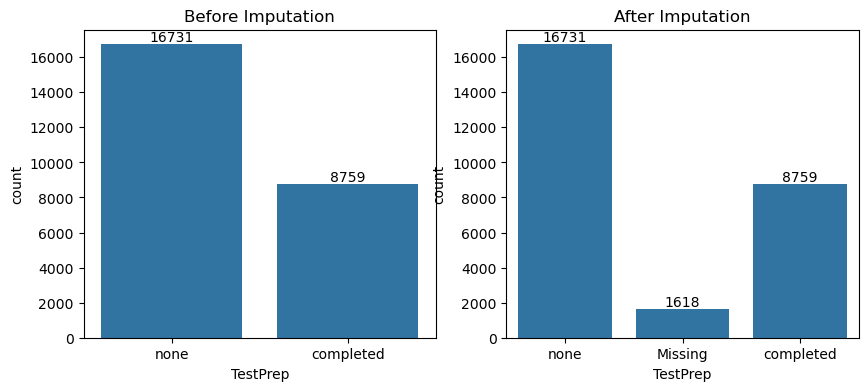

In [115]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Before Imputation')
ax=sns.countplot(df,x='TestPrep')
for bar in ax.containers:
    ax.bar_label(bar)

plt.subplot(1,2,2)
plt.title('After Imputation')
ax=sns.countplot(df_mis,x='TestPrep')
for bar in ax.containers:
    ax.bar_label(bar) 

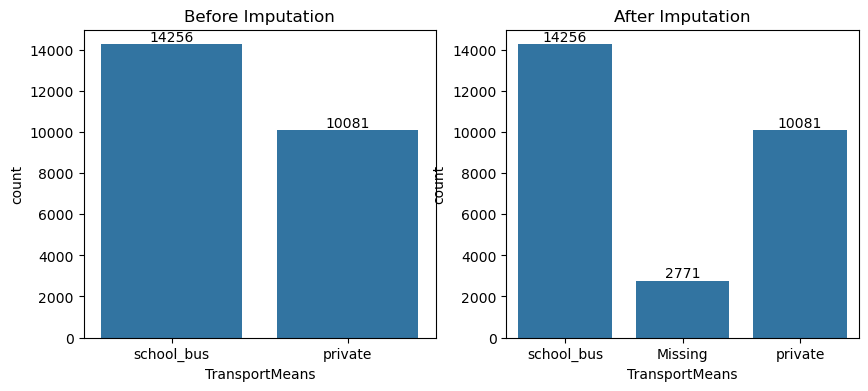

In [116]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Before Imputation')
ax=sns.countplot(df,x='TransportMeans')
for bar in ax.containers:
    ax.bar_label(bar)

plt.subplot(1,2,2)
plt.title('After Imputation')
ax=sns.countplot(df_mis,x='TransportMeans')
for bar in ax.containers:
    ax.bar_label(bar) 

In [117]:
df_mis[categorical].isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
TransportMeans         0
WklyStudyHours         0
dtype: int64

 <b>Missing indicator</b> also gives good results but on more column is added.

# <center>Handling Missing Values On Numerical Columns<center>

In [118]:
df[numerical].isnull().sum()

NrSiblings      1388
MathScore          0
ReadingScore       0
WritingScore       0
dtype: int64

In [119]:
num_missing_col=['NrSiblings']

# <center>====Mean Imputation====</center>

In [133]:
df_mean=df.copy()

In [134]:
df_mean[numerical].isnull().sum()

NrSiblings      1388
MathScore          0
ReadingScore       0
WritingScore       0
dtype: int64

In [135]:
def meanimputation(data,columns):
    data=df
    
    for col in columns:
        mean=df_mean[col].mean() 
        df_mean[col].fillna(mean,inplace=True)
        

In [136]:
meanimputation(df_mean,num_missing_col)

In [137]:
df_mean[numerical].isnull().sum()

NrSiblings      0
MathScore       0
ReadingScore    0
WritingScore    0
dtype: int64

# <center>Comparing distribution before and after Mean imputation<center>

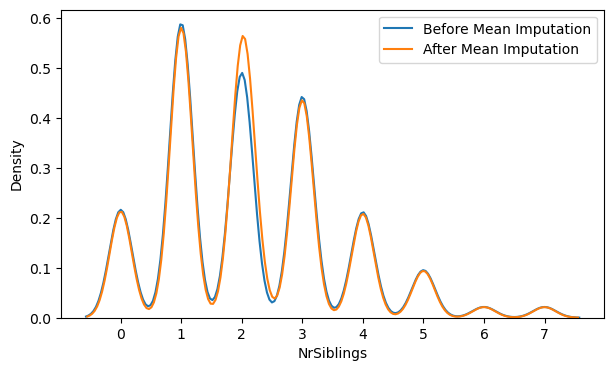

In [181]:
plt.figure(figsize=(7,4))
sns.kdeplot(df,x='NrSiblings',label='Before Mean Imputation')
sns.kdeplot(df_mean,x='NrSiblings',label='After Mean Imputation')
plt.legend()

# <center>====Median Imputation====<center>

In [139]:
df_mdn=df.copy()

In [140]:
df_mdn[numerical].isnull().sum()

NrSiblings      1388
MathScore          0
ReadingScore       0
WritingScore       0
dtype: int64

In [141]:
def medianimputation(data,columns):
    data=df
    
    for col in columns:
        median=df_mdn[col].median() 
        df_mdn[col].fillna(median,inplace=True)
        

In [142]:
medianimputation(df_mdn,num_missing_col)

In [143]:
df_mdn[numerical].isnull().sum()

NrSiblings      0
MathScore       0
ReadingScore    0
WritingScore    0
dtype: int64

# <center>Comparing distribution before and after Median imputation<center>

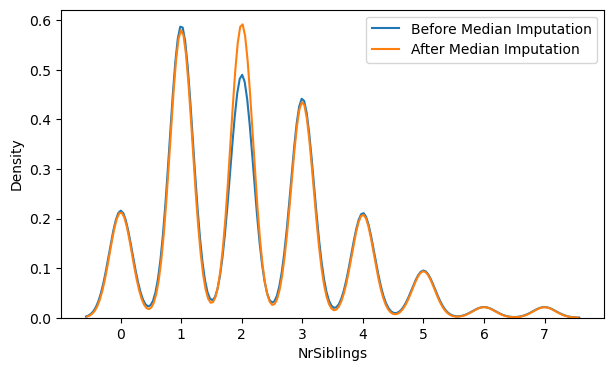

In [184]:
plt.figure(figsize=(7,4))
sns.kdeplot(df,x='NrSiblings',label='Before Median Imputation')
sns.kdeplot(df_mdn,x='NrSiblings',label='After Median Imputation')
plt.legend()

# <center>====Random Value Imputation====<center>

In [145]:
df_ran1=df.copy()

In [146]:
df_ran1[numerical].isnull().sum()

NrSiblings      1388
MathScore          0
ReadingScore       0
WritingScore       0
dtype: int64

In [147]:
def randomvalueimputation(data,columns):
    data=df
    for col in columns:
        missing=df_ran1[col].isnull().sum()
        
        pool = df_ran1[col].dropna().sample(missing).values
        
        df_ran1[col][df_ran1[col].isnull()]=pool
        

In [148]:
randomvalueimputation(df_ran1,num_missing_col)

C:\Users\manish singh\AppData\Local\Temp\ipykernel_20840\2573720035.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ran1[col][df_ran1[col].isnull()]=pool


In [149]:
df_ran1[numerical].isnull().sum()

NrSiblings      0
MathScore       0
ReadingScore    0
WritingScore    0
dtype: int64

# <center>Comparing distribution before and after Random value imputation<center>

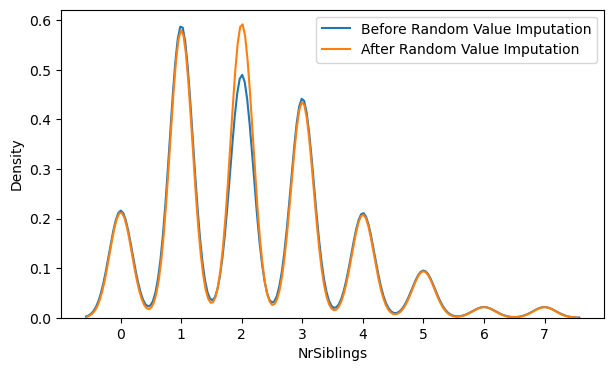

In [185]:
plt.figure(figsize=(7,4))
sns.kdeplot(df,x='NrSiblings',label='Before Random Value Imputation')
sns.kdeplot(df_mdn,x='NrSiblings',label='After Random Value Imputation')
plt.legend()

<b>Mean,Median and Random Value Imputation</b> all three gives exactly same results while handling missing values in Nrsiblings column.

# Concluison:
> <b>In categorical columns we used Mode Impuation , Random Value Imputation and Missing Indicator for handling missing values.
   all three techniques gave decent results but Random Value Imputation gave better results than other two.
   So we are selecting Random Value Imputation in categorical missing values.</b>
   
> <b> In numerical columns we used Mean Imputation, Mode Imputation and Random Value Impuatation. All three gave same exactly 
    same results . So, we are selecting Random Value Imputation for numerical columns.

# <center>===== Identifying Outliers =====<center>

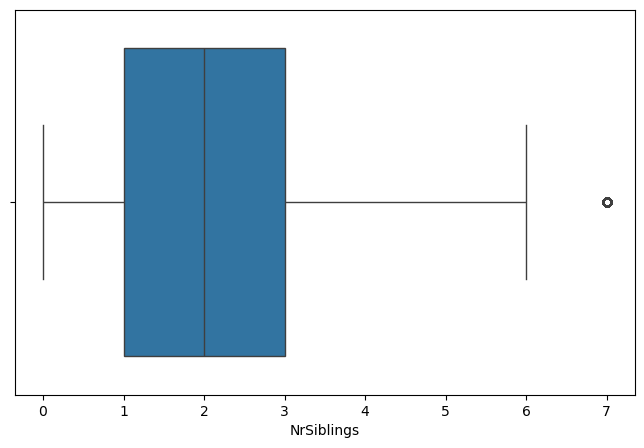

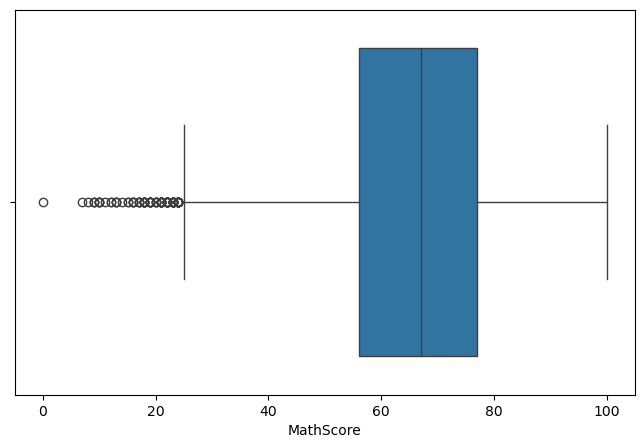

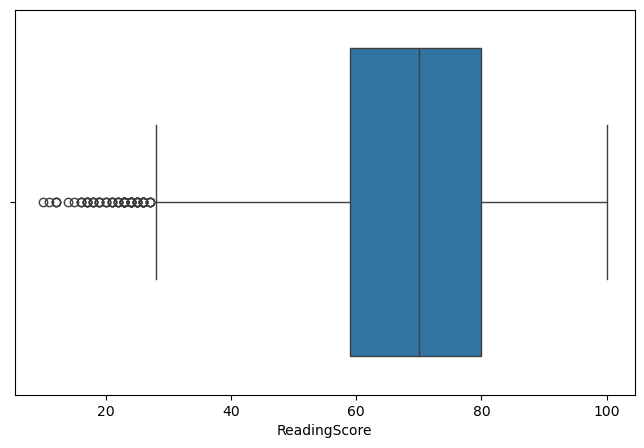

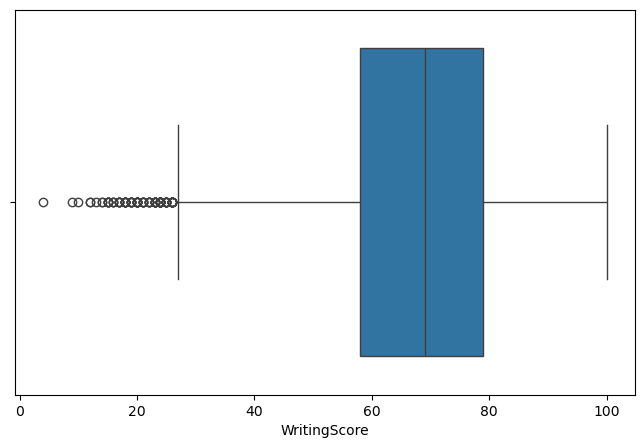

In [151]:
for num in numerical:
    plt.figure(figsize=(8,5))
    sns.boxplot(df,x=num)

In [152]:
outliers_cols=['NrSiblings','MathScore','ReadingScore','WritingScore']

In [17]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

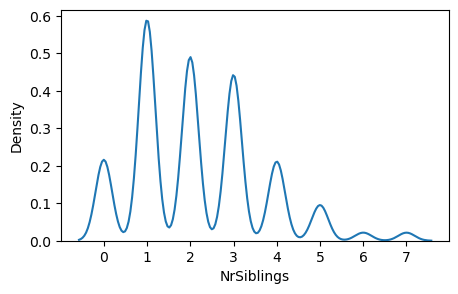

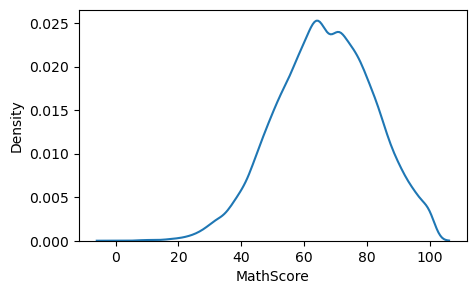

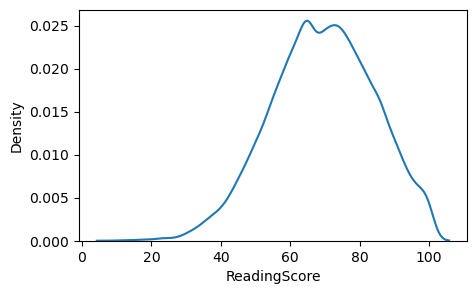

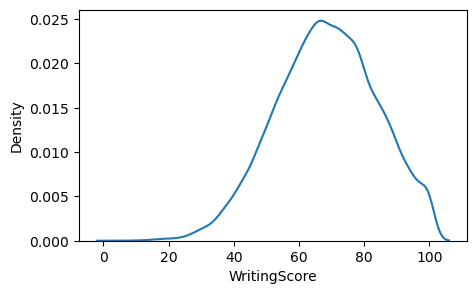

In [153]:
#Distribution of data before handling outlier:

for num in numerical:
    plt.figure(figsize=(5,3))
    sns.kdeplot(df,x=num)

# <center>Handling Outliers by Boundary Values<center>

In [154]:
df_bv=df.copy()

In [155]:
def boundaryvale(data,columns):
    data=df
    
    for col in columns:
        ub=df_bv[col].mean()+3*df_bv[col].std()
        lb=df_bv[col].mean()-3*df_bv[col].std()


        df_bv[(df_bv[col]>ub) | (df_bv[col]<lb)]



        df_bv[(df_bv[col]<ub) & (df_bv[col]>lb)]


 
        df_bv[col]=np.where(df_bv[col]>ub,ub,np.where(df_bv[col]<lb,lb,df_bv[col]))

In [156]:
boundaryvale(df_bv,outliers_cols)

# <center> Comparing Curves before and after handling outliers by boundary value <center>

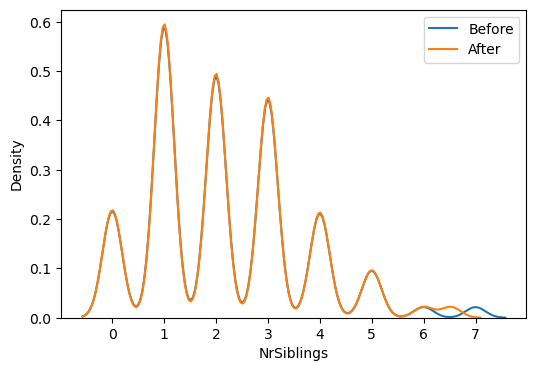

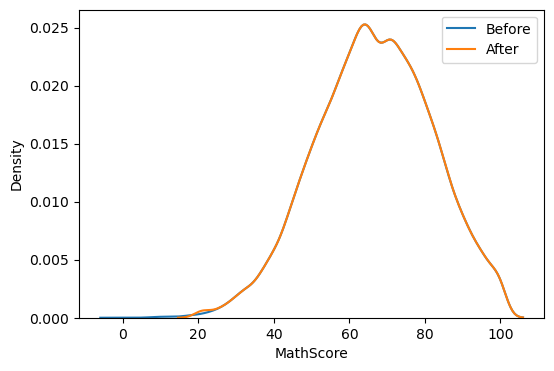

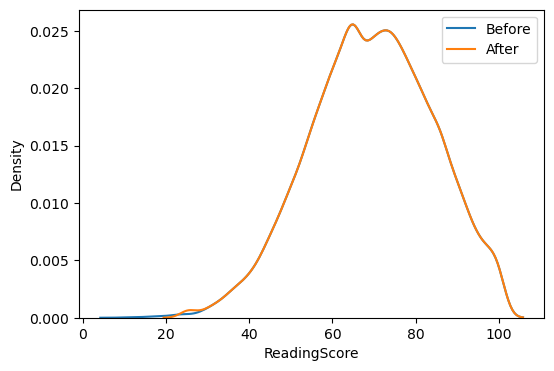

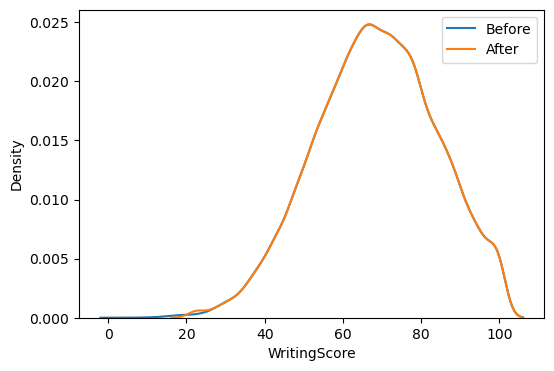

In [157]:
plt.figure(figsize=(6,4))
sns.kdeplot(df,x='NrSiblings',label='Before')
sns.kdeplot(df_bv,x='NrSiblings',label='After',)
plt.legend()

plt.figure(figsize=(6,4))
sns.kdeplot(df,x='MathScore',label='Before')
sns.kdeplot(df_bv,x='MathScore',label='After',)
plt.legend()

plt.figure(figsize=(6,4))
sns.kdeplot(df,x='ReadingScore',label='Before')
sns.kdeplot(df_bv,x='ReadingScore',label='After',)
plt.legend()

plt.figure(figsize=(6,4))
sns.kdeplot(df,x='WritingScore',label='Before')
sns.kdeplot(df_bv,x='WritingScore',label='After',)
plt.legend()

#### Boundary value method work very well on handling outliers in all four columns but there's a small  changes or distortion in the  between curves after using it.

# <center>Handling Outliers by IQR method<center>

In [158]:
df_iqr=df.copy()

In [159]:
def iqr_method(data,columns):
    data=df
    for col in columns:
        p25=df_iqr[col].quantile(0.25)
        p75=df_iqr[col].quantile(0.75)



        iqr=p75-p25
        uf=p75+1.5*iqr
        lf=p25-1.5*iqr

        df_iqr[(df_iqr[col]>uf) | (df_iqr[col]<lf)]

        df_iqr[(df_iqr[col]<uf) & (df_iqr[col]>lf)]

        df_iqr[col]=np.where(df_iqr[col]>uf,uf,np.where(df_iqr[col]<lf,lf,df_iqr[col]))

In [160]:
iqr_method(df_iqr,outliers_cols)

# <center> Comparing curves before and after handling outliers by iqr method <center>

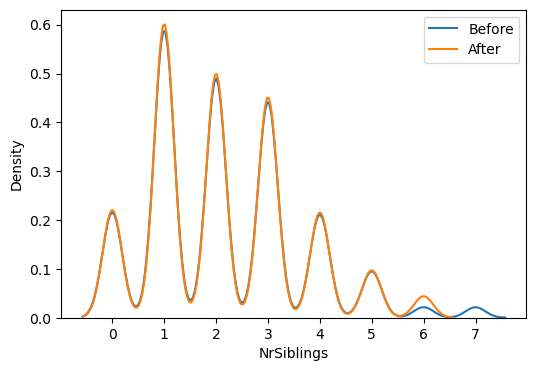

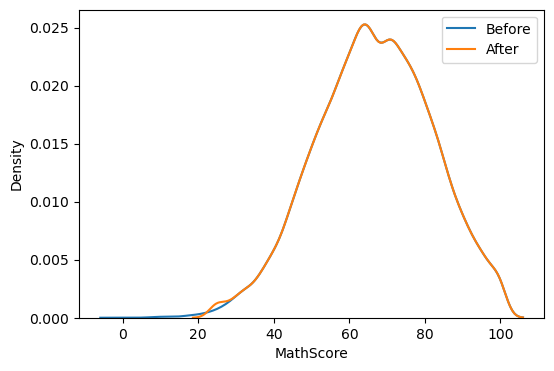

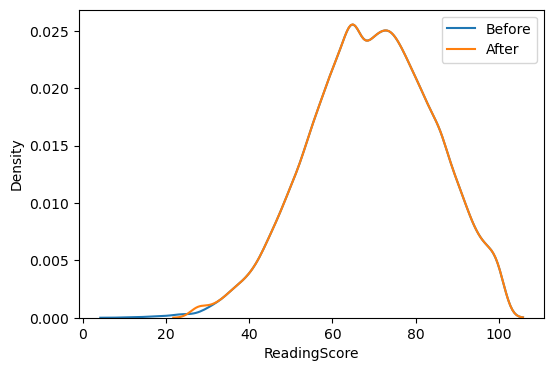

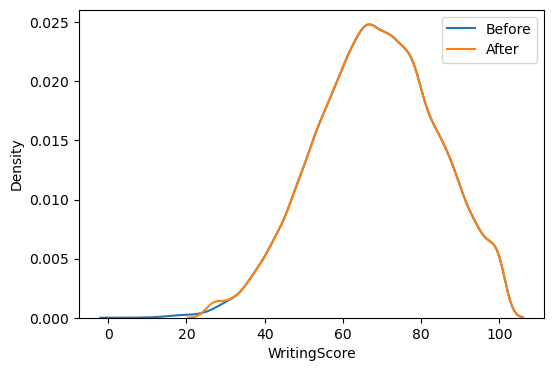

In [161]:
plt.figure(figsize=(6,4))
sns.kdeplot(df,x='NrSiblings',label='Before')
sns.kdeplot(df_iqr,x='NrSiblings',label='After',)
plt.legend()

plt.figure(figsize=(6,4))
sns.kdeplot(df,x='MathScore',label='Before')
sns.kdeplot(df_iqr,x='MathScore',label='After',)
plt.legend()

plt.figure(figsize=(6,4))
sns.kdeplot(df,x='ReadingScore',label='Before')
sns.kdeplot(df_iqr,x='ReadingScore',label='After',)
plt.legend()

plt.figure(figsize=(6,4))
sns.kdeplot(df,x='WritingScore',label='Before')
sns.kdeplot(df_iqr,x='WritingScore',label='After',)
plt.legend()

<Axes: xlabel='WritingScore'>

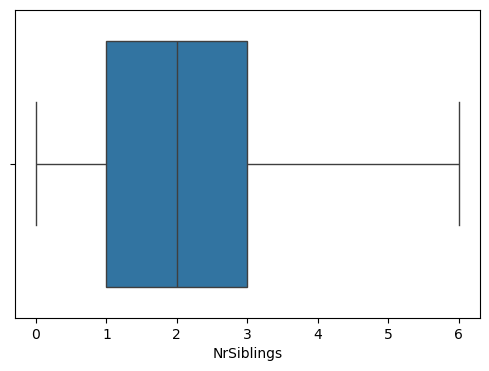

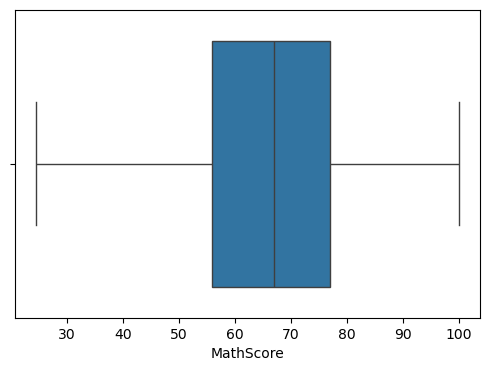

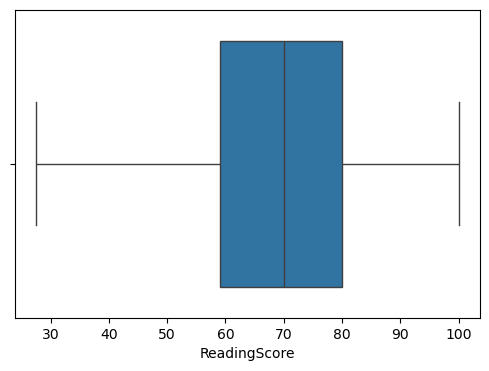

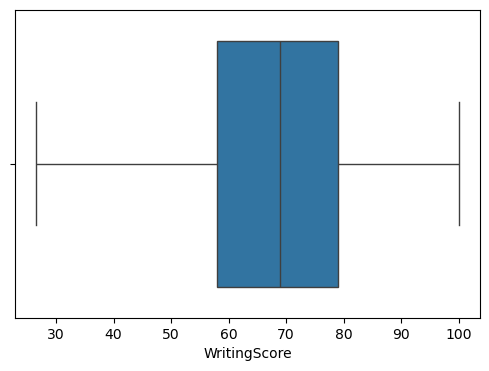

In [162]:
plt.figure(figsize=(6,4))
sns.boxplot(df_iqr,x='NrSiblings')


plt.figure(figsize=(6,4))
sns.boxplot(df_iqr,x='MathScore')


plt.figure(figsize=(6,4))
sns.boxplot(df_iqr,x='ReadingScore',)

plt.figure(figsize=(6,4))
sns.boxplot(df_iqr,x='WritingScore')

<br><b>IQR method</b> gives better result than <b>Boundary value method</b> as there's very less Changes or Distortion in curves.than <b>Boundary value method</b>.

# <center>Handling outliers by Percentile Method</center>

In [163]:
df_pm=df.copy()

In [164]:
def percentile_method(data,columns):
    data=df
    
    for col in columns:
        ul=df_pm[col].quantile(0.95)
        ll=df_pm[col].quantile(0.05)


        df_pm[(df_pm[col]>ul) | (df_pm[col]<ll)]

        df_pm[(df_pm[col]<ul) & (df_pm[col]>ll)]

        df_pm[col]=np.where(df_pm[col]>ul,ul,np.where(df_pm[col]<ll,ll,df_pm[col]))

In [165]:
percentile_method(df_pm,outliers_cols)

# <center>Comparing curves before and after handling outliers by percentile method <center>

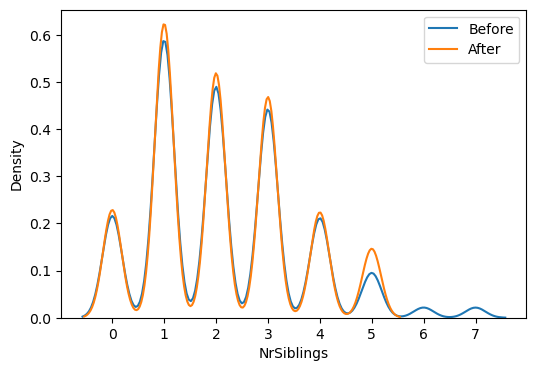

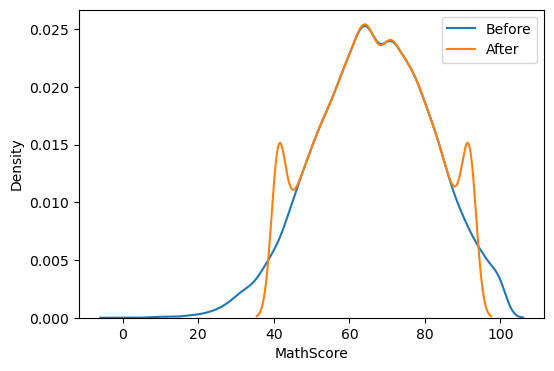

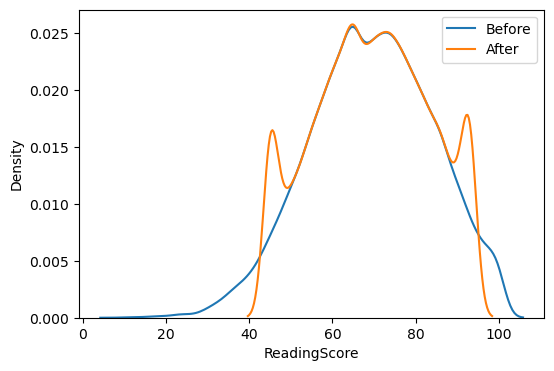

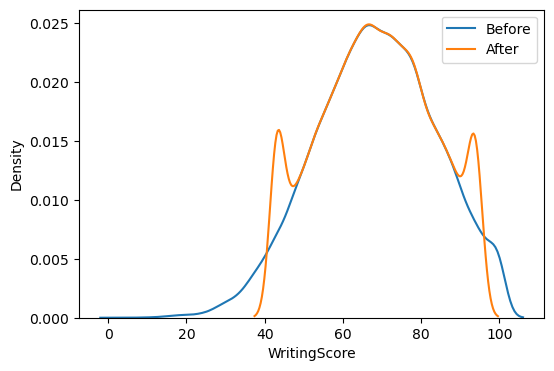

In [166]:
plt.figure(figsize=(6,4))
sns.kdeplot(df,x='NrSiblings',label='Before')
sns.kdeplot(df_pm,x='NrSiblings',label='After',)
plt.legend()

plt.figure(figsize=(6,4))
sns.kdeplot(df,x='MathScore',label='Before')
sns.kdeplot(df_pm,x='MathScore',label='After',)
plt.legend()

plt.figure(figsize=(6,4))
sns.kdeplot(df,x='ReadingScore',label='Before')
sns.kdeplot(df_pm,x='ReadingScore',label='After',)
plt.legend()

plt.figure(figsize=(6,4))
sns.kdeplot(df,x='WritingScore',label='Before')
sns.kdeplot(df_pm,x='WritingScore',label='After',)
plt.legend()

<Axes: xlabel='WritingScore'>

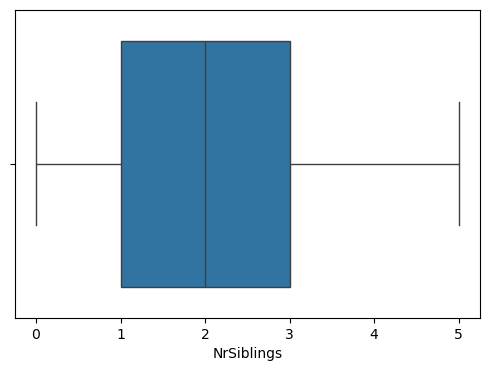

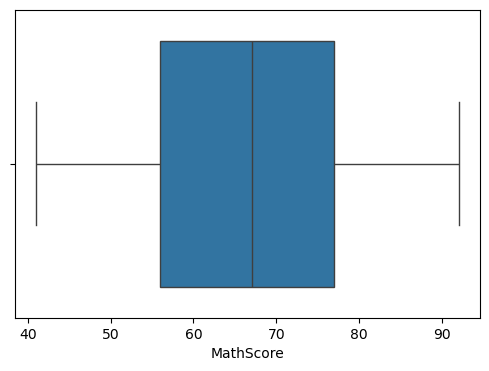

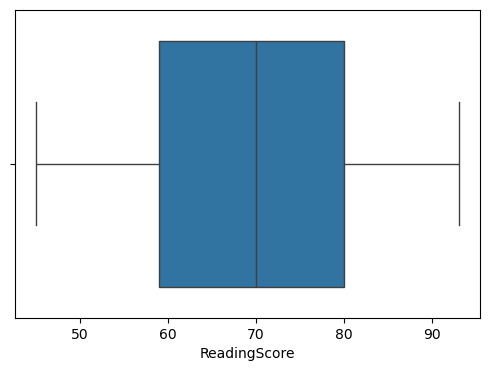

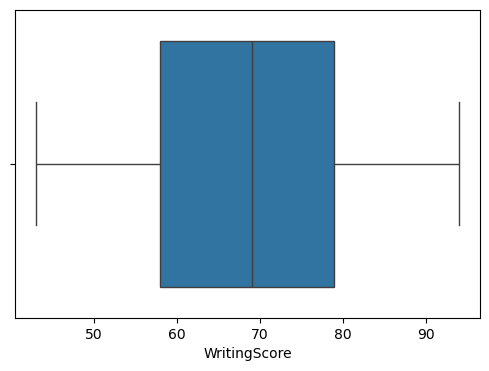

In [167]:
plt.figure(figsize=(6,4))
sns.boxplot(df_pm,x='NrSiblings')


plt.figure(figsize=(6,4))
sns.boxplot(df_pm,x='MathScore')


plt.figure(figsize=(6,4))
sns.boxplot(df_pm,x='ReadingScore',)

plt.figure(figsize=(6,4))
sns.boxplot(df_pm,x='WritingScore')

 <b>percentile method</b> gives worst result in all four columns while handling outliers,because after handling outliers 
by percentile method distribution of columns changes.where as <b>IQR and Boundary value method</b> perform best.

# Conclusion:
>We used three techniques for handling outliers.
 But <b>IQR method</b> gives best results while handling outliers although <b>boundary value method</b> also gives similar 
 results but we would select <b>IQR method</b> for handling outliers. And <b>percentile method</b> gives worst result.

>So, we are selecting IQR Method for handling Outliers.
